In [89]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import seaborn as sns

In [90]:
df_raw = pd.read_csv('kredit.csv')

In [91]:
df = df_raw.copy(deep=True)

In [92]:
df['altersgruppe'] = np.nan

lst = [df]

for col in lst:
    col.loc[(col['alter'] > 18) & (col['alter'] <= 25), 'altersgruppe'] = 'Young Adults'
    col.loc[(col['alter'] > 25) & (col['alter'] <= 39), 'altersgruppe'] = 'Adults'
    col.loc[(col['alter'] > 39) & (col['alter'] <= 59), 'altersgruppe'] = 'Senior'
    col.loc[col['alter'] > 59, 'altersgruppe'] = 'Elder' 
    
df.head()

,kredit,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,altersgruppe
0,1,1,18,4,2,1049,1,2,4,2,...,2,21,3,1,1,3,1,1,1,Young Adults
1,1,1,9,4,0,2799,1,3,2,3,...,1,36,3,1,2,3,2,1,1,Adults
2,1,2,12,2,9,841,2,4,2,2,...,1,23,3,1,1,2,1,1,1,Young Adults
3,1,1,12,4,0,2122,1,3,3,3,...,1,39,3,1,2,2,2,1,2,Adults
4,1,1,12,4,0,2171,1,3,4,3,...,2,38,1,2,2,2,1,1,2,Adults


In [93]:
df['zahlung pro monat'] = df['hoehe'] / df['laufzeit']

In [94]:
df.head()

,kredit,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,...,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,altersgruppe,zahlung pro monat
0,1,1,18,4,2,1049,1,2,4,2,...,21,3,1,1,3,1,1,1,Young Adults,58.277778
1,1,1,9,4,0,2799,1,3,2,3,...,36,3,1,2,3,2,1,1,Adults,311.000000
2,1,2,12,2,9,841,2,4,2,2,...,23,3,1,1,2,1,1,1,Young Adults,70.083333
3,1,1,12,4,0,2122,1,3,3,3,...,39,3,1,2,2,2,1,2,Adults,176.833333
4,1,1,12,4,0,2171,1,3,4,3,...,38,1,2,2,2,1,1,2,Adults,180.916667


In [95]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [96]:
X = df.drop('kredit', axis=1)

In [97]:
y = df['kredit']

In [98]:
categorical_columns = ['laufkont', 'moral', 'verw', 'sparkont', 'beszeit',
       'rate', 'famges', 'buerge', 'wohnzeit', 'verm', 'weitkred',
       'wohn', 'bishkred', 'beruf', 'pers', 'telef', 'gastarb', 'altersgruppe']

numerical_columns = ['laufzeit', 'hoehe', 'alter', 'zahlung pro monat']

X_cat = df[categorical_columns]
X_num = df[numerical_columns].values

In [99]:
# One Hot Encoder before split

ohe = OneHotEncoder()
ohe.fit(X_cat)

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [100]:
X_cat = ohe.transform(X_cat).toarray()

In [81]:
# scaling before train test split

scaler = StandardScaler()
X_num = scaler.fit_transform(X_num)

In [101]:
X = np.hstack((X_cat, X_num))

In [154]:
ohe.get_feature_names()

array(['x0_1', 'x0_2', 'x0_3', 'x0_4', 'x1_0', 'x1_1', 'x1_2', 'x1_3',
       'x1_4', 'x2_0', 'x2_1', 'x2_2', 'x2_3', 'x2_4', 'x2_5', 'x2_6',
       'x2_8', 'x2_9', 'x2_10', 'x3_1', 'x3_2', 'x3_3', 'x3_4', 'x3_5',
       'x4_1', 'x4_2', 'x4_3', 'x4_4', 'x4_5', 'x5_1', 'x5_2', 'x5_3',
       'x5_4', 'x6_1', 'x6_2', 'x6_3', 'x6_4', 'x7_1', 'x7_2', 'x7_3',
       'x8_1', 'x8_2', 'x8_3', 'x8_4', 'x9_1', 'x9_2', 'x9_3', 'x9_4',
       'x10_1', 'x10_2', 'x10_3', 'x11_1', 'x11_2', 'x11_3', 'x12_1',
       'x12_2', 'x12_3', 'x12_4', 'x13_1', 'x13_2', 'x13_3', 'x13_4',
       'x14_1', 'x14_2', 'x15_1', 'x15_2', 'x16_1', 'x16_2', 'x17_Adults',
       'x17_Elder', 'x17_Senior', 'x17_Young Adults'], dtype=object)

In [150]:
X.shape

(1000, 76)

In [102]:
from sklearn.model_selection import train_test_split

In [151]:
X

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [106]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [148]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(ohe.get_feature_names())
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

#fs = SelectKBest(score_func=chi2, k=10)
#fs.fit(X_train,y_train)
#X_train_fs = fs.transform(X_train)
#X_test_fs = fs.transform(X_test)

#feat_col = []
##cols = fs.get_support(indices=True)
##features_df_new = X.iloc[:,cols]
#for i in range(len(fs.scores_)):
# feat_col.append(fs.scores_[i])
# print('Feature %d: %f' % (i, fs.scores_[i]))

   Features         Score
73      NaN  38167.771423
72      NaN    219.934083
3      x0_4     44.199148
0      x0_1     42.290959
5      x1_1     14.734694
8      x1_4     14.556391
23     x3_5     12.190476
4      x1_0     11.311987
19     x3_1     10.159122
75      NaN      9.758747


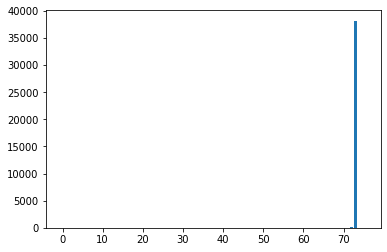

In [143]:
from matplotlib import pyplot

pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [141]:
print(sorted_des)

None
